## Exercises:

1. Modify the data generation function to take the slope, intercept, and sample size as arguments.
2. Modify the SS decomposition function to conduct the F-test for testing whether the true slope is zero or not.
4. Holding the intercept, sample size, and error variance constant, compare how different values of the slope affect:
   
    a. the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
5. Holding the slope, sample size, and error variance constant, compare how different values of the intercept affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
6. Holding the intercept, slope, and error variance constant, compare how different values of the sample size affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
7. Write a function which calculates the t-statistic for testing whether the true slope is zero or not. For each simulation you run, calculate both the t-stat and the F-stat. Repeat this B=100 times, then plot the ordered pairs $\{(t_b, F_b)\}_{b=1}^B$ as a scatter plot. What relationship do you observe between them? Can you prove this relation?

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.linear_model import LinearRegression
import scipy.stats as stats

np.random.seed(42)


## Q1

In [2]:
#1
def generate_data(sigma,beta0,beta1,n):
    
    X = np.linspace(start=1, stop=10,num=n).reshape(-1, 1) #array w/ 1 column, the -1 means 'infer the # of rows'
    
    # Generate epsilon as a 1D array of N(0, sigma^2) RVs
    epsilon = sigma * np.random.randn(n)
    
    # Generate y using SLR model
    y = beta0 + beta1 * X.flatten() + epsilon
    return X, y 

## Q2

In [3]:
def ss_decomp(sigma=2,beta0=3,beta1=4,n=15):

    #Genrate data
    X,y = generate_data(sigma,beta0,beta1,n)
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of y
    y_mean = np.mean(y)

    #calculate SS quantities
    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)

    #calculate F Statistic
    F = (SSR/1)/(SSE/(n-2)) 
    alpha = 0.05
    dfn = 1  # degrees of freedom numerator
    dfd = n-2  # degrees of freedom denominator
    critical_value = stats.f.ppf(1 - alpha, dfn, dfd)
    
    # Output the sum of squares decomposition
    print(f"\u03B2\u2080: {beta0}, \u03B2\u2081: {beta1}, n: {n}, singma: {sigma}")
    print(f"Sample size: {n}")
    print(f"SST (Total Sum of Squares): {SST}")
    print(f"SSR (Regression Sum of Squares): {SSR}")
    print(f"SSE (Error Sum of Squares): {SSE}")
    print(f"SST = SSR + SSE: {np.isclose(SST, SSR + SSE)}")
    print(f"F-Statistic: {F:.4f}")
    print(f"Critical Value: {critical_value:.4f}")
    
    print(f"Coefficient of Determination, R² is: {np.round(1-SSE/SST, 4)}")
    if F > critical_value:
        print(f"As F is greater than critical value, @ alpha = {alpha}, we reject the null hypothesis and say \u03B2\u2081 is not equal to 0\n")
    
    else:
        print(f"As F is less than critical value, @ aplha = {alpha}, we do not have enough evidence to reject the null hypothesis that \u03B2\u2081 is equal to 0\n")
    
    #make a ggplot
    df = pd.DataFrame({
        'X': X.flatten(),
        'y': y,
        'predicted': y_pred,
        'y_mean':  y_mean
        
    })

    gg1 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', yend = 'y_mean'), color = "black") + #SST components
        ggtitle(f"R² is {np.round(1-SSE/SST, 4)}")
        )

    gg2 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', y = 'predicted', yend = 'y_mean'), color = "blue", linetype = "dashed") + #SSR components 
        geom_segment(aes(xend = 'X',  yend = 'predicted'), color = "red", linetype = "dashed") + #SSE components
        ggtitle(f"R² is {np.round(1-SSE/SST, 4)}")
        )

    display(gg1, gg2)
    
    return gg1, gg2

In [4]:
import matplotlib.pyplot as plt
def ss_decomp_graph(sigma=2,beta0=3,beta1=4,n=15):
    
    X,y = generate_data(sigma,beta0,beta1,n)
   
    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    y_mean = np.mean(y)

    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)

    F = (SSR/1)/(SSE/(n-2))
    R_2 = np.round(1-SSE/SST, 4)

    return SSR, SSE, SST, F, R_2

## Q3

Hypothesis Test:
H₀: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 3, β₁: 0.7, n: 15, singma: 2
Sample size: 15
SST (Total Sum of Squares): 44.7845
SSR (Regression Sum of Squares): 9.3855
SSE (Error Sum of Squares): 35.399
SST = SSR + SSE: True
F-Statistic: 3.4467
Critical Value: 4.6672
Coefficient of Determination, R² is: 0.2096
As F is less than critical value, @ aplha = 0.05, we do not have enough evidence to reject the null hypothesis that β₁ is equal to 0



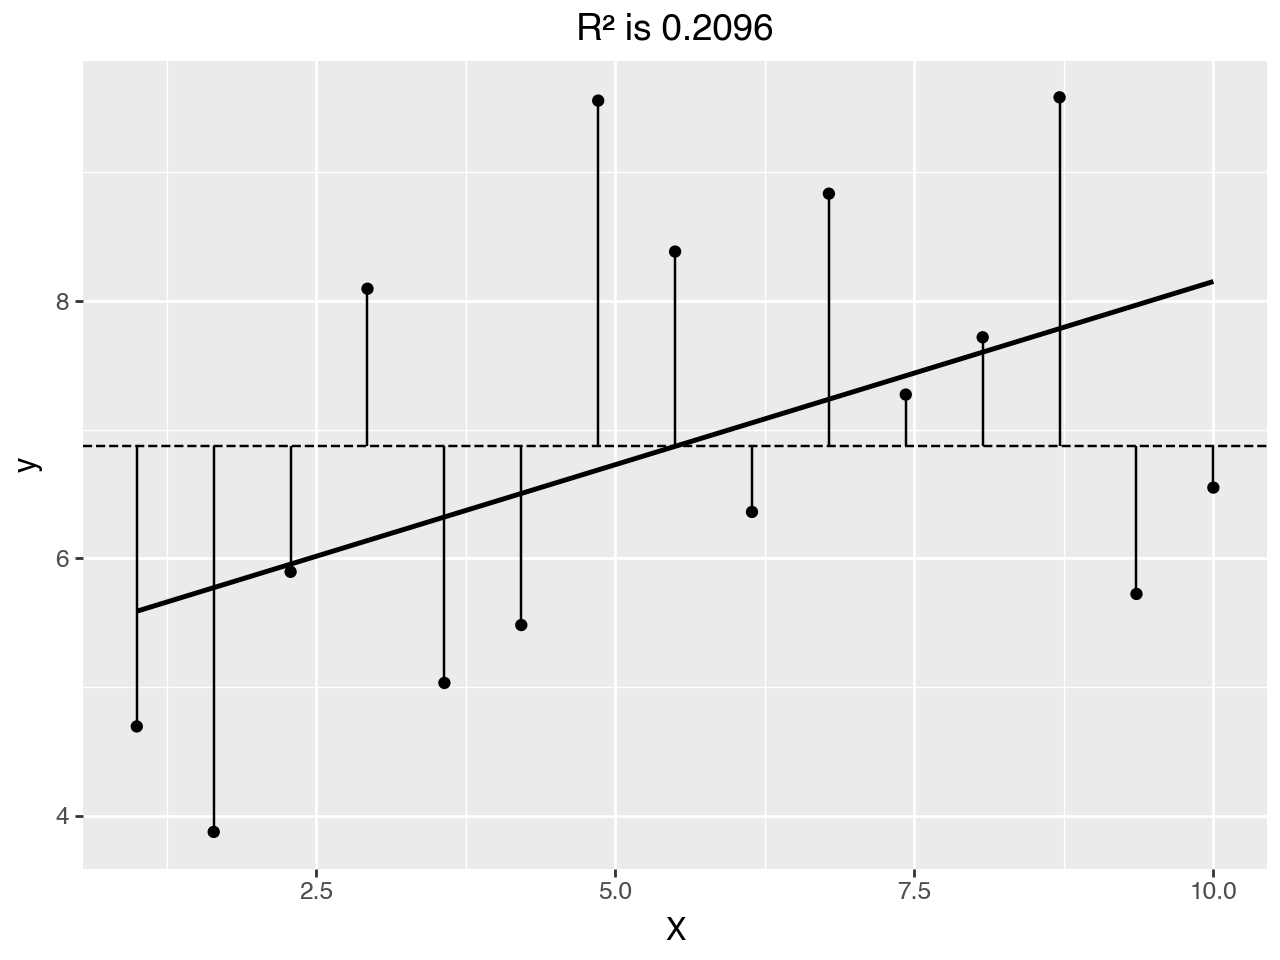

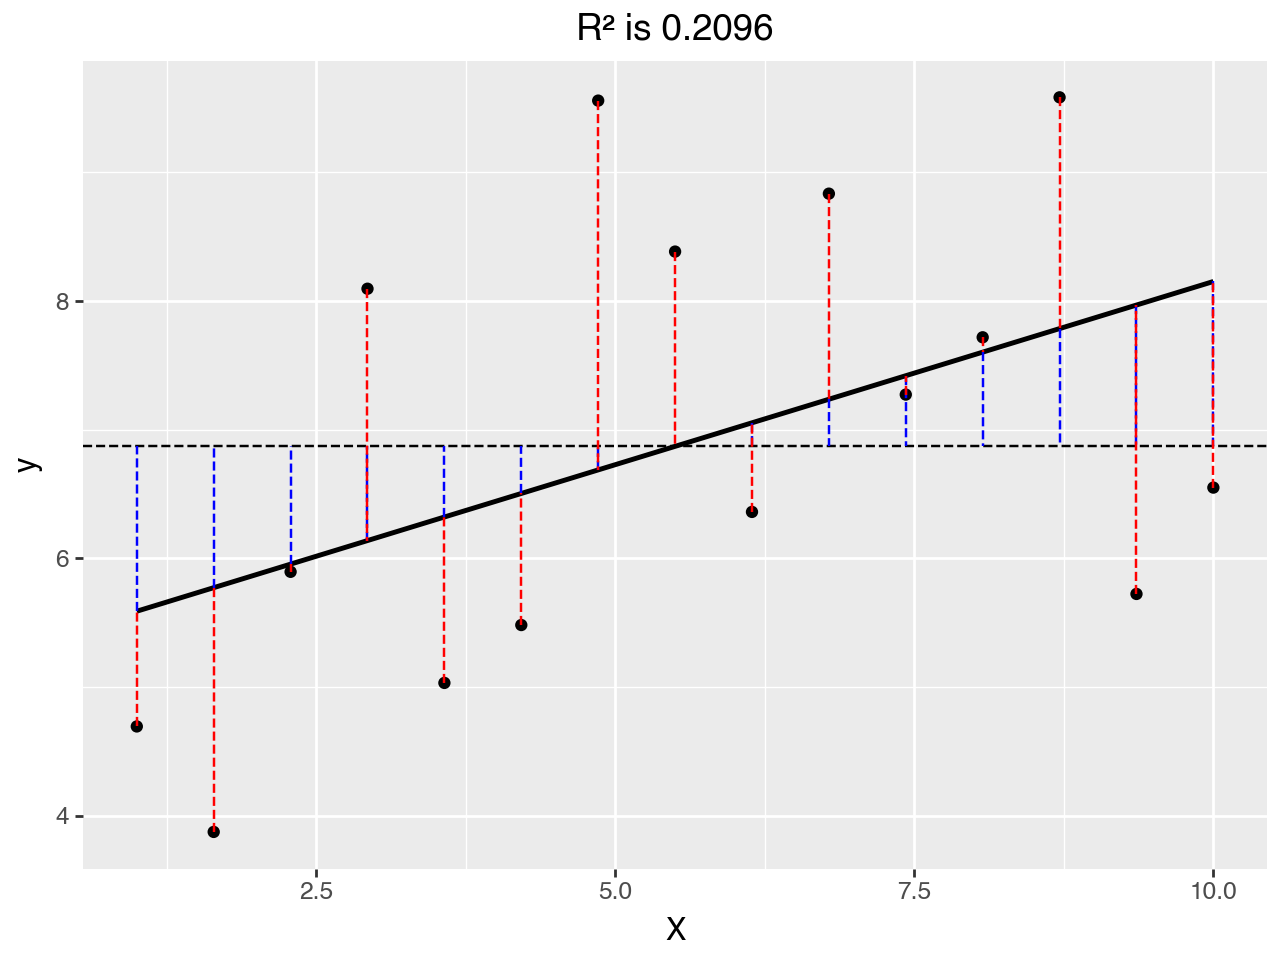

(<plotnine.ggplot.ggplot at 0x341c89490>,
 <plotnine.ggplot.ggplot at 0x341d3e350>)

In [5]:
print(f"Hypothesis Test:\nH\u2080: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(beta1=0.7)

Hypothesis Test:
H₀: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 3, β₁: 1, n: 15, singma: 2
Sample size: 15
SST (Total Sum of Squares): 157.4516
SSR (Regression Sum of Squares): 123.6989
SSE (Error Sum of Squares): 33.7527
SST = SSR + SSE: True
F-Statistic: 47.6432
Critical Value: 4.6672
Coefficient of Determination, R² is: 0.7856
As F is greater than critical value, @ alpha = 0.05, we reject the null hypothesis and say β₁ is not equal to 0



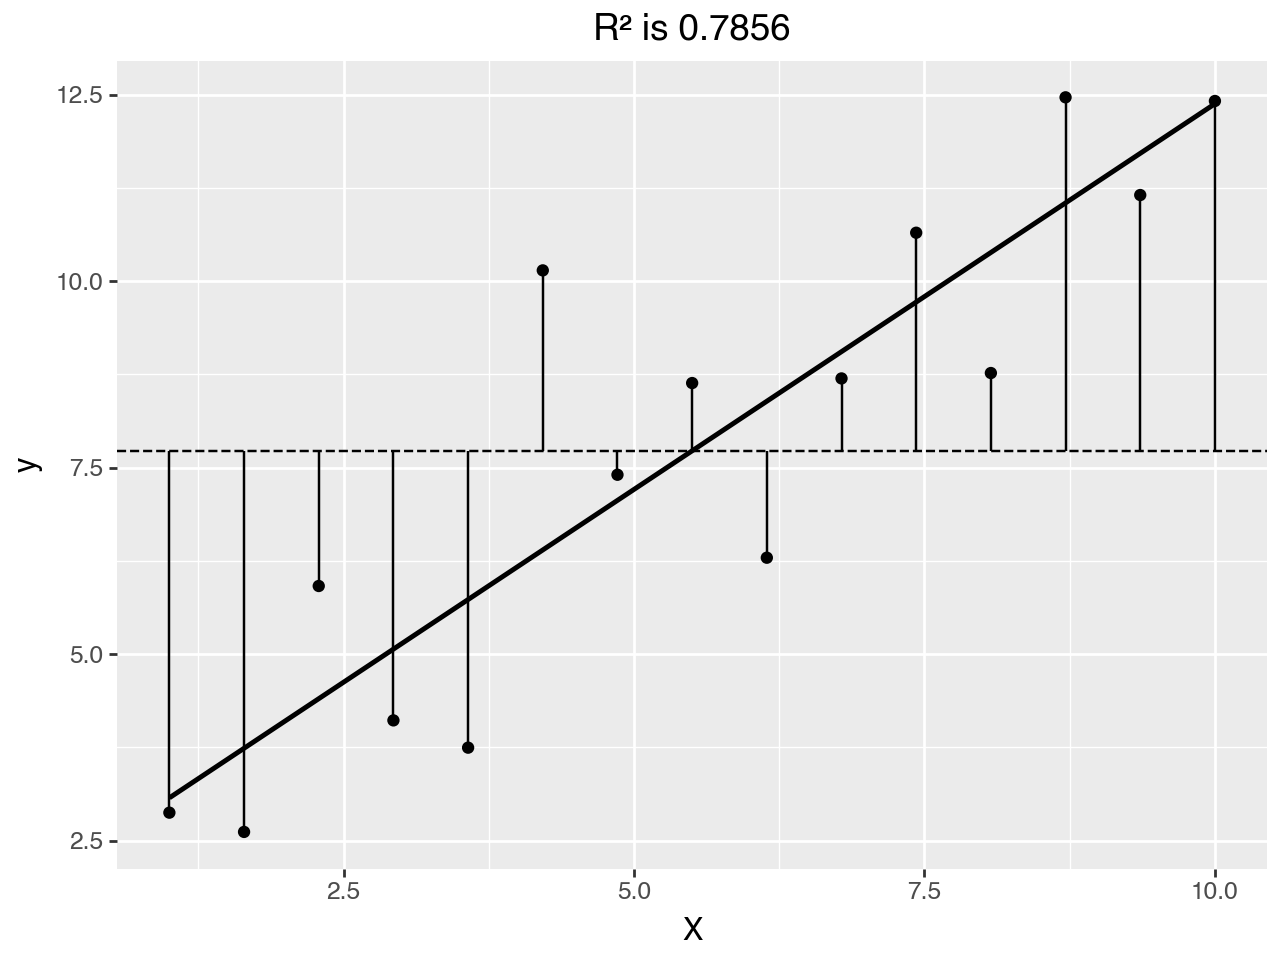

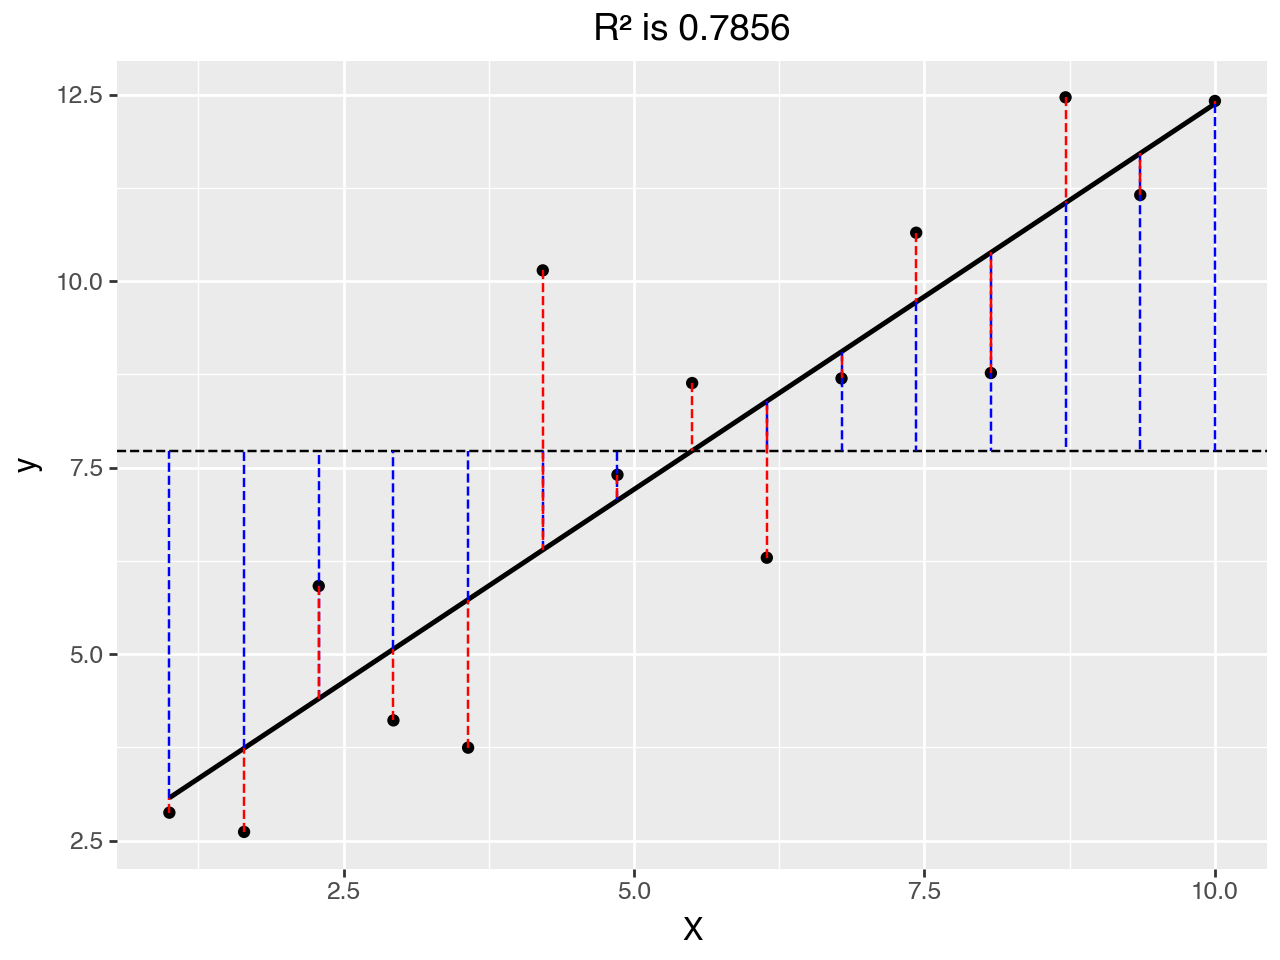

(<plotnine.ggplot.ggplot at 0x3435516d0>,
 <plotnine.ggplot.ggplot at 0x343551190>)

In [6]:
print(f"Hypothesis Test:\nH\u2080: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(beta1=1)

Hypothesis Test:
H₀: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 3, β₁: 5, n: 15, singma: 2
Sample size: 15
SST (Total Sum of Squares): 2775.9876
SSR (Regression Sum of Squares): 2720.5636
SSE (Error Sum of Squares): 55.424
SST = SSR + SSE: True
F-Statistic: 638.1230
Critical Value: 4.6672
Coefficient of Determination, R² is: 0.98
As F is greater than critical value, @ alpha = 0.05, we reject the null hypothesis and say β₁ is not equal to 0



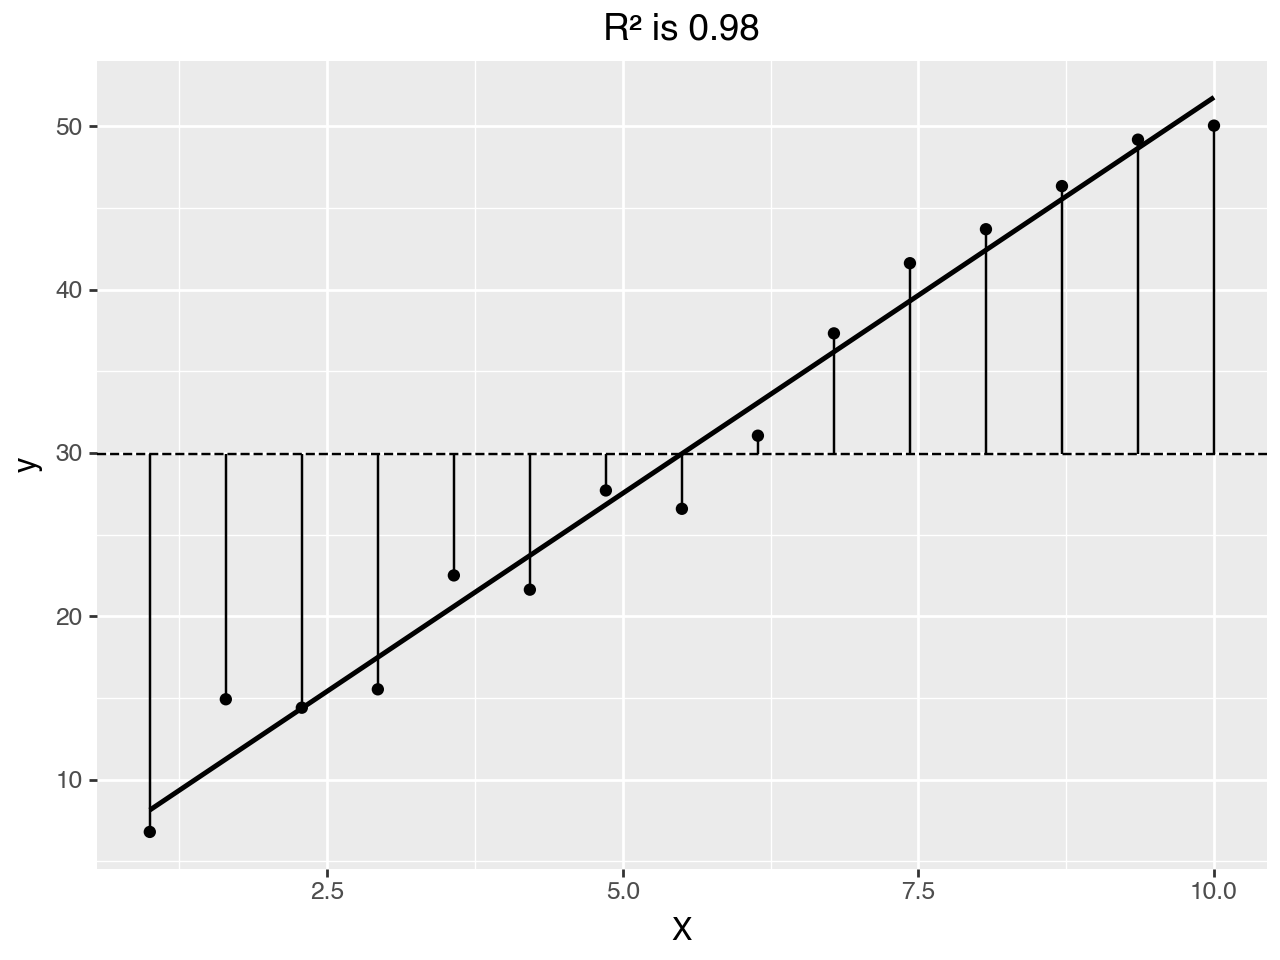

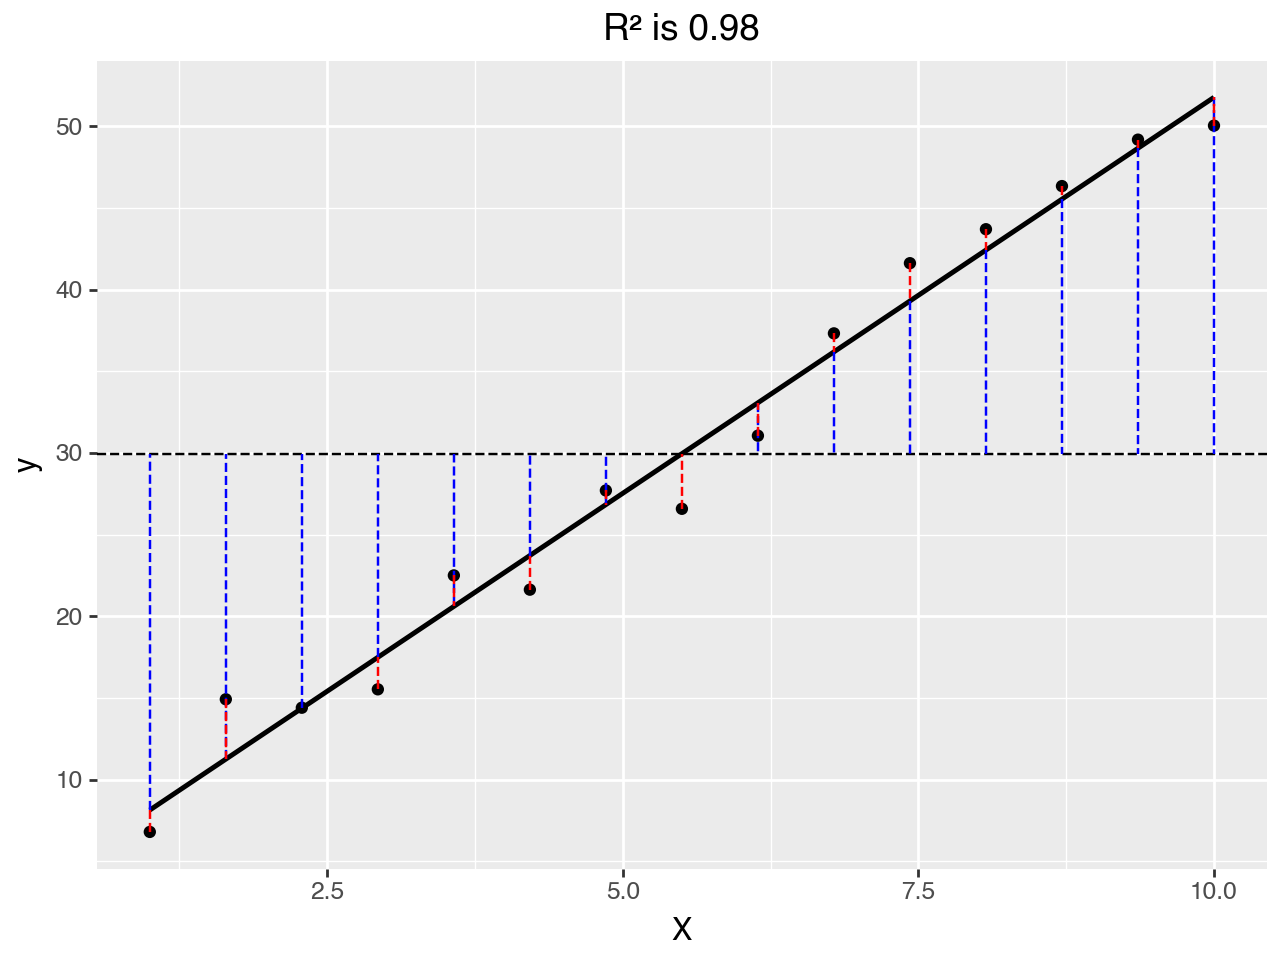

(<plotnine.ggplot.ggplot at 0x3447e0890>,
 <plotnine.ggplot.ggplot at 0x3447268d0>)

In [7]:
print(f"Hypothesis Test:\nH\u2080: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(beta1=5)

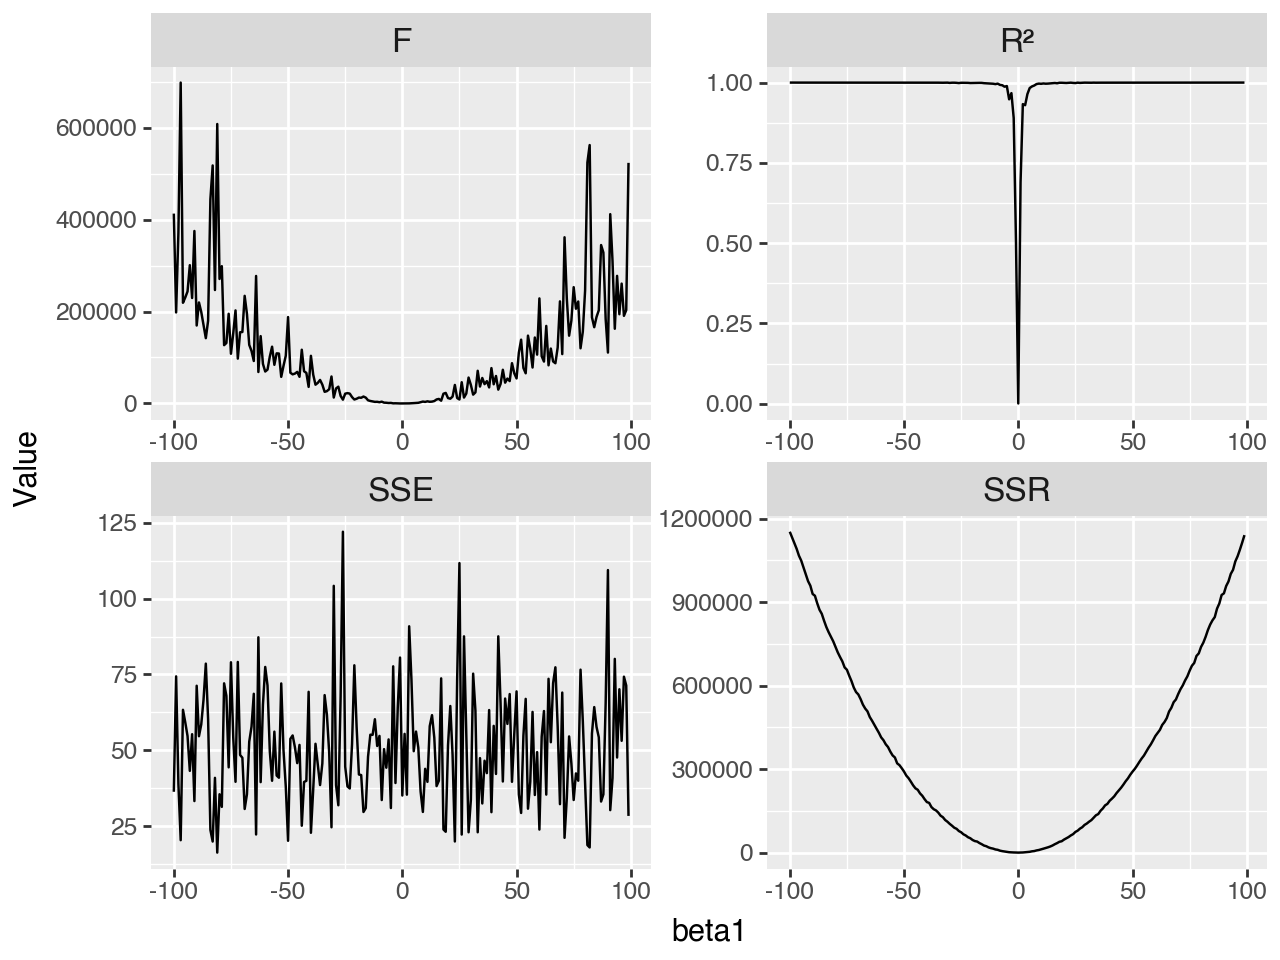

In [8]:
x_vals = list(range(-100, 100))
records = []

for x in x_vals:
    ssr, sse, _, fval, r2 = ss_decomp_graph(beta1=x)
    records.append({"x": x, "value": ssr, "metric": "SSR"})
    records.append({"x": x, "value": sse, "metric": "SSE"})
    records.append({"x": x, "value": fval, "metric": "F"})
    records.append({"x": x, "value": r2,  "metric": "R²"})

df = pd.DataFrame(records)

# Plot with facets (2x2 layout)
(
    ggplot(df, aes("x", "value"))
    + geom_line()
    + facet_wrap("~metric", ncol=2, scales="free")
    + labs(x="beta1", y="Value")
    + theme(strip_text=element_text(size=12))
)


Holding the intercept, sample size, and error variance constant, compare how different values of the slope affect:
   
    a. the SS decomposition,
    b. the plots,
    c. the coefficient of determination, and
    d. the hypothesis test results.
   What do you find?

a. SS decomposition: 
- if slope is positive, SSE increases and decreases alternately in a trend, SSR increases and F statistic increases (with few deviations throughout) as slope is increased 
- if slope is negative, SSE increases and decreases alternately in a trend, SSR increases and F statistic increases (with few deviations throughout) as slope is decreased 

b. Plots:
- slope of regression line increases as slope increases
- SSE components increase/decrease as slope is increased
- SSR components increase as slope is increased

c. Coefficient of determination:
- Increases exponentially with increase in slope or decrease in slope. Large increase for values closer to 0.

d. Hypothesis test results:
- for values closer to 0, F statistic is less than critical value, hence there is no enough evidence to reject null hypothesis that slope is 0
- for values greater or lesser than around 0, F statistic is greater than critical value, hence we can reject null hypothesis and say that slope is not eqaul to 0.

## Q4

Hypothesis Test:
H₁: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 0.1, β₁: 4, n: 15, singma: 2
Sample size: 15
SST (Total Sum of Squares): 1872.316
SSR (Regression Sum of Squares): 1812.2276
SSE (Error Sum of Squares): 60.0883
SST = SSR + SSE: True
F-Statistic: 392.0723
Critical Value: 4.6672
Coefficient of Determination, R² is: 0.9679
As F is greater than critical value, @ alpha = 0.05, we reject the null hypothesis and say β₁ is not equal to 0



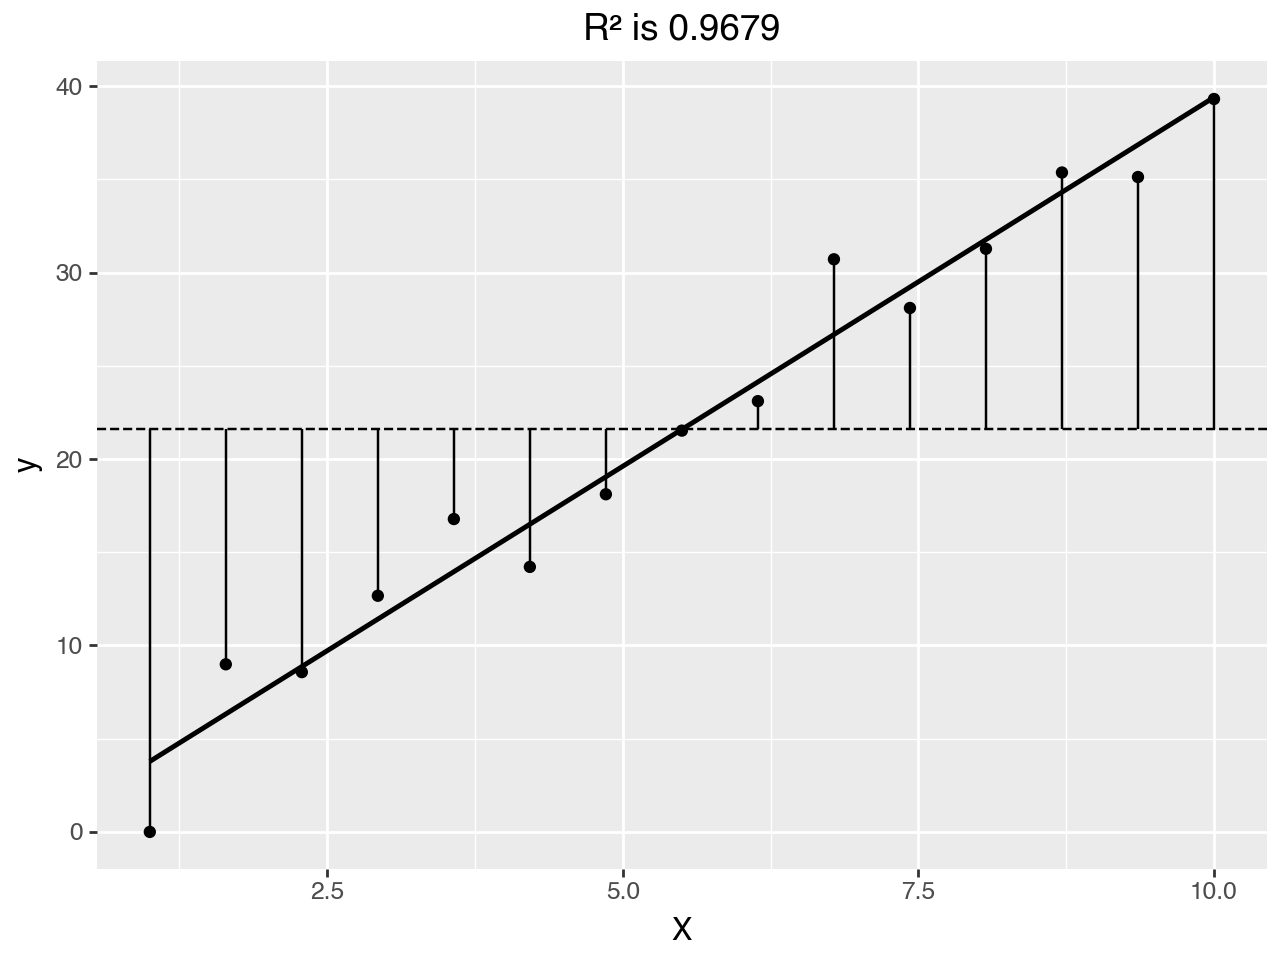

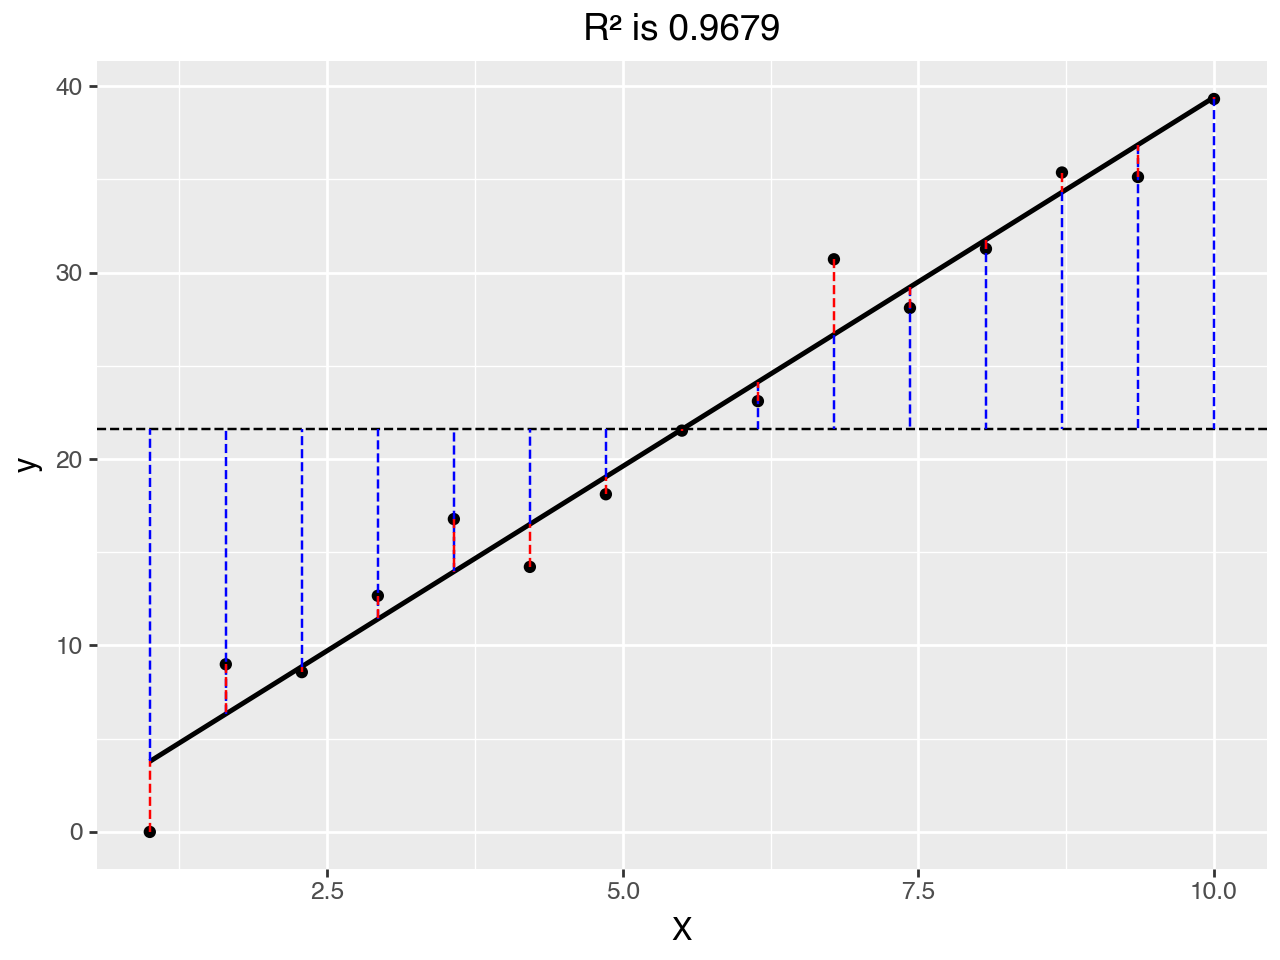

(<plotnine.ggplot.ggplot at 0x33c424f50>,
 <plotnine.ggplot.ggplot at 0x33c426150>)

In [62]:
print(f"Hypothesis Test:\nH\u2081: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(beta0=0.1)

Hypothesis Test:
H₀: The slope β₀ = 0
H₁: The slope β₀ ≠ 0

β₀: 1, β₁: 4, n: 15, singma: 2
Sample size: 15
SST (Total Sum of Squares): 2059.0506
SSR (Regression Sum of Squares): 2006.6672
SSE (Error Sum of Squares): 52.3834
SST = SSR + SSE: True
F-Statistic: 497.9950
Critical Value: 4.6672
Coefficient of Determination, R² is: 0.9746
As F is greater than critical value, @ alpha = 0.05, we reject the null hypothesis and say β₁ is not equal to 0



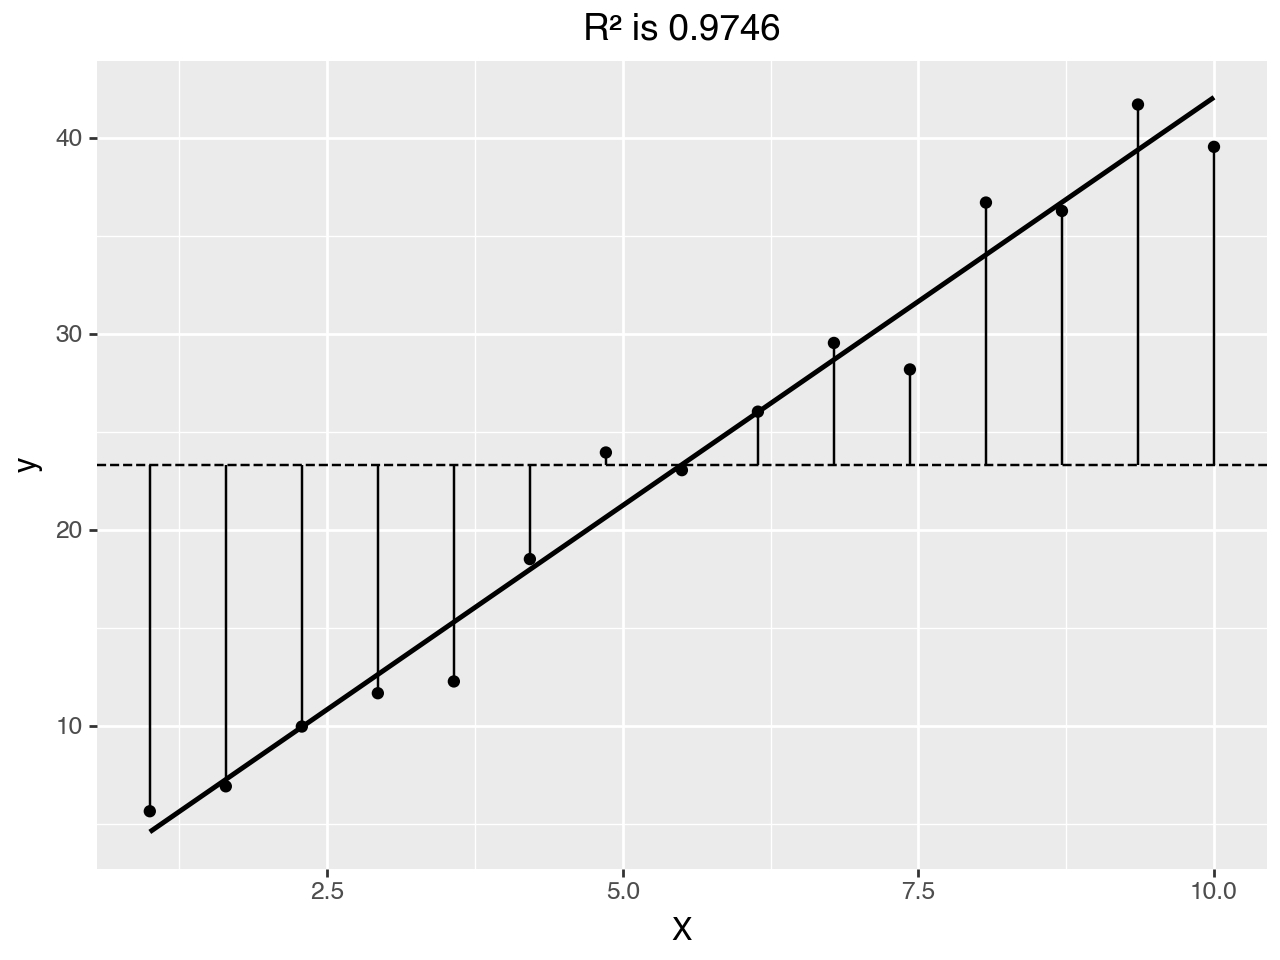

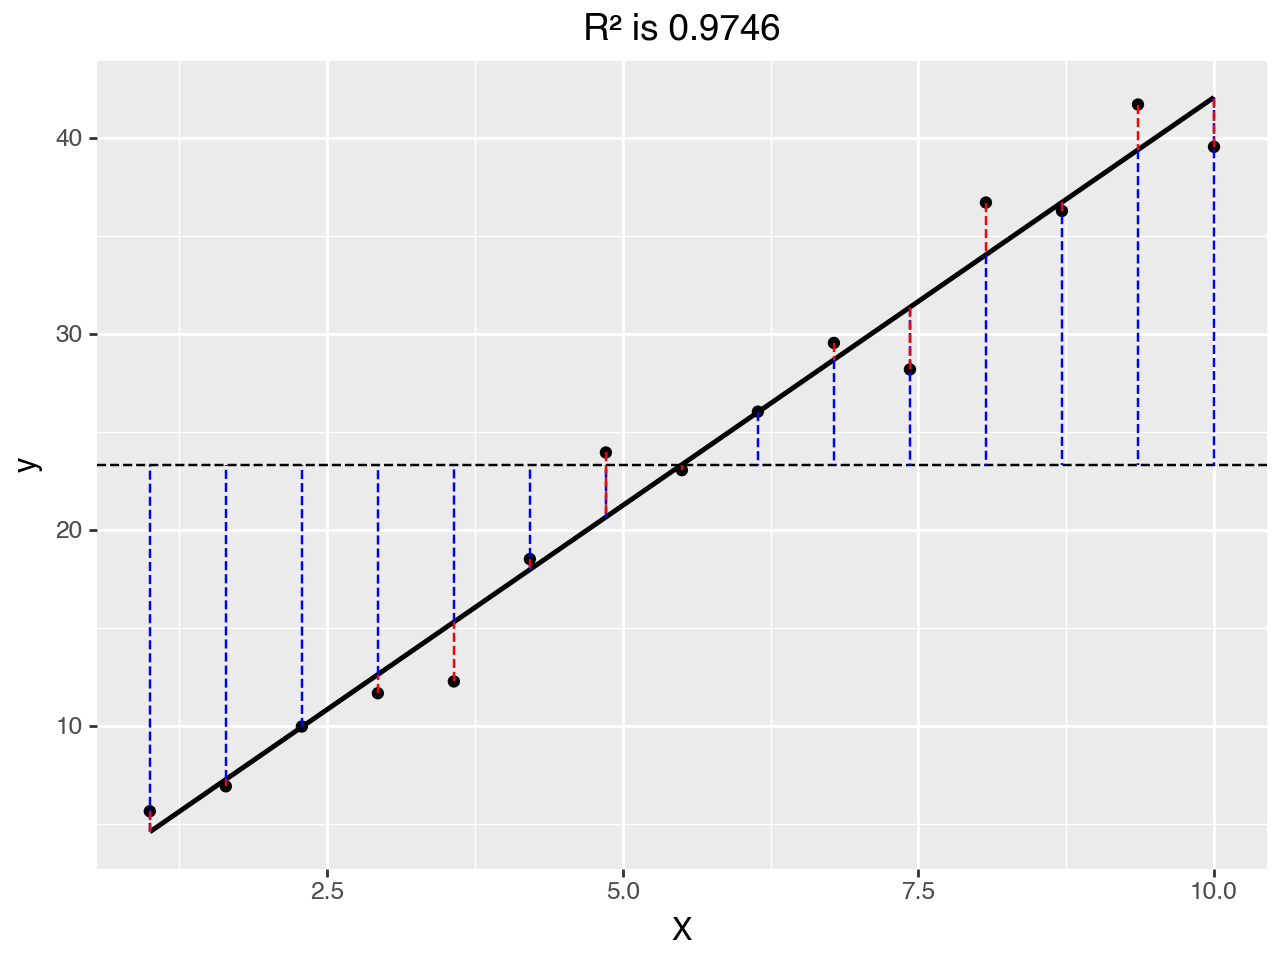

(<plotnine.ggplot.ggplot at 0x33c977ad0>,
 <plotnine.ggplot.ggplot at 0x33c975490>)

In [63]:
print(f"Hypothesis Test:\nH\u2080: The slope \u03B2\u2080 = 0\nH\u2081: The slope \u03B2\u2080 \u2260 0\n")
ss_decomp(beta0=1)

Hypothesis Test:
H₁: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 20, β₁: 4, n: 15, singma: 2
Sample size: 15
SST (Total Sum of Squares): 1625.9048
SSR (Regression Sum of Squares): 1572.1028
SSE (Error Sum of Squares): 53.802
SST = SSR + SSE: True
F-Statistic: 379.8620
Critical Value: 4.6672
Coefficient of Determination, R² is: 0.9669
As F is greater than critical value, @ alpha = 0.05, we reject the null hypothesis and say β₁ is not equal to 0



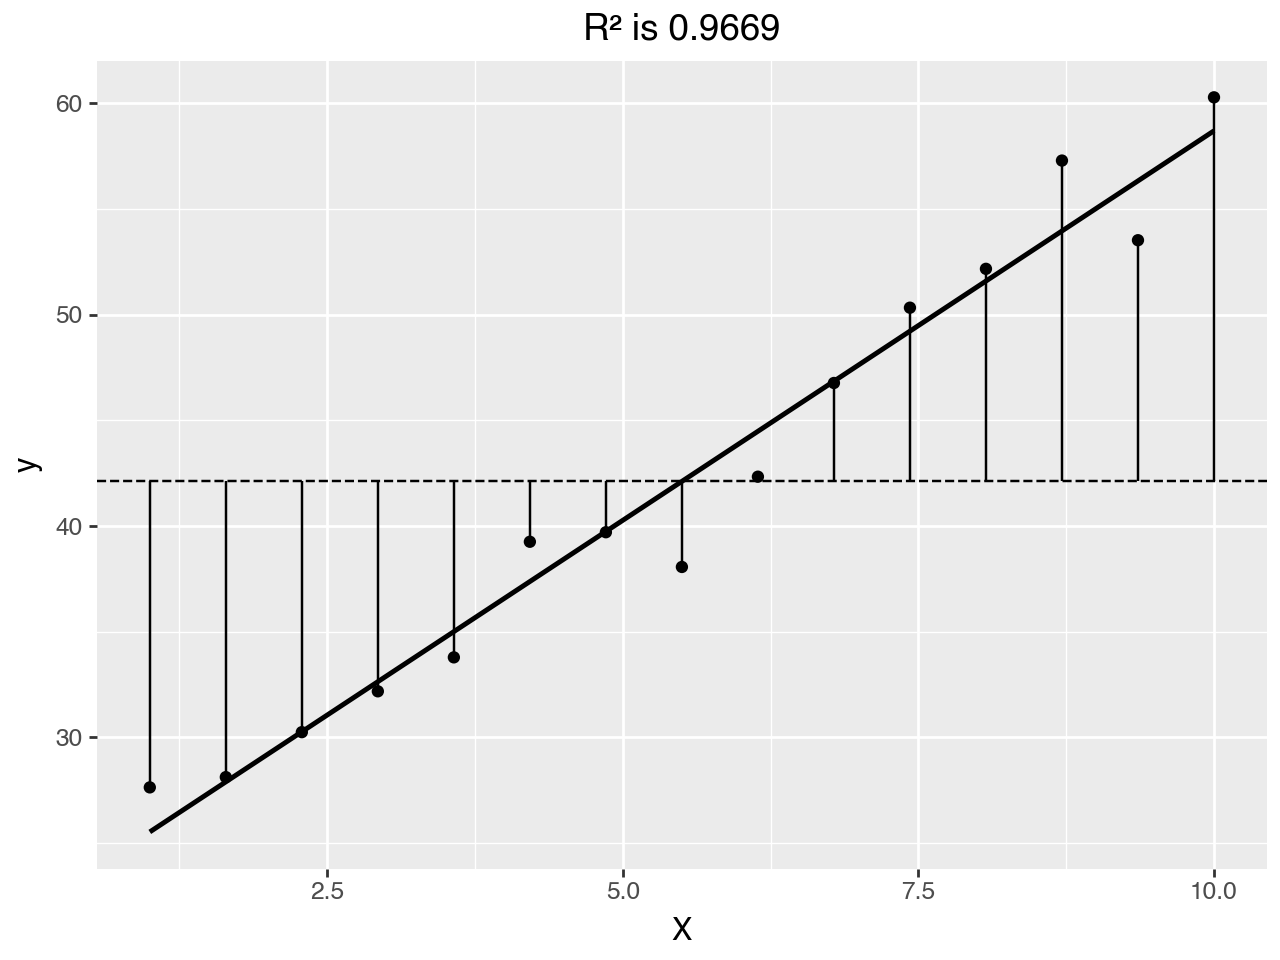

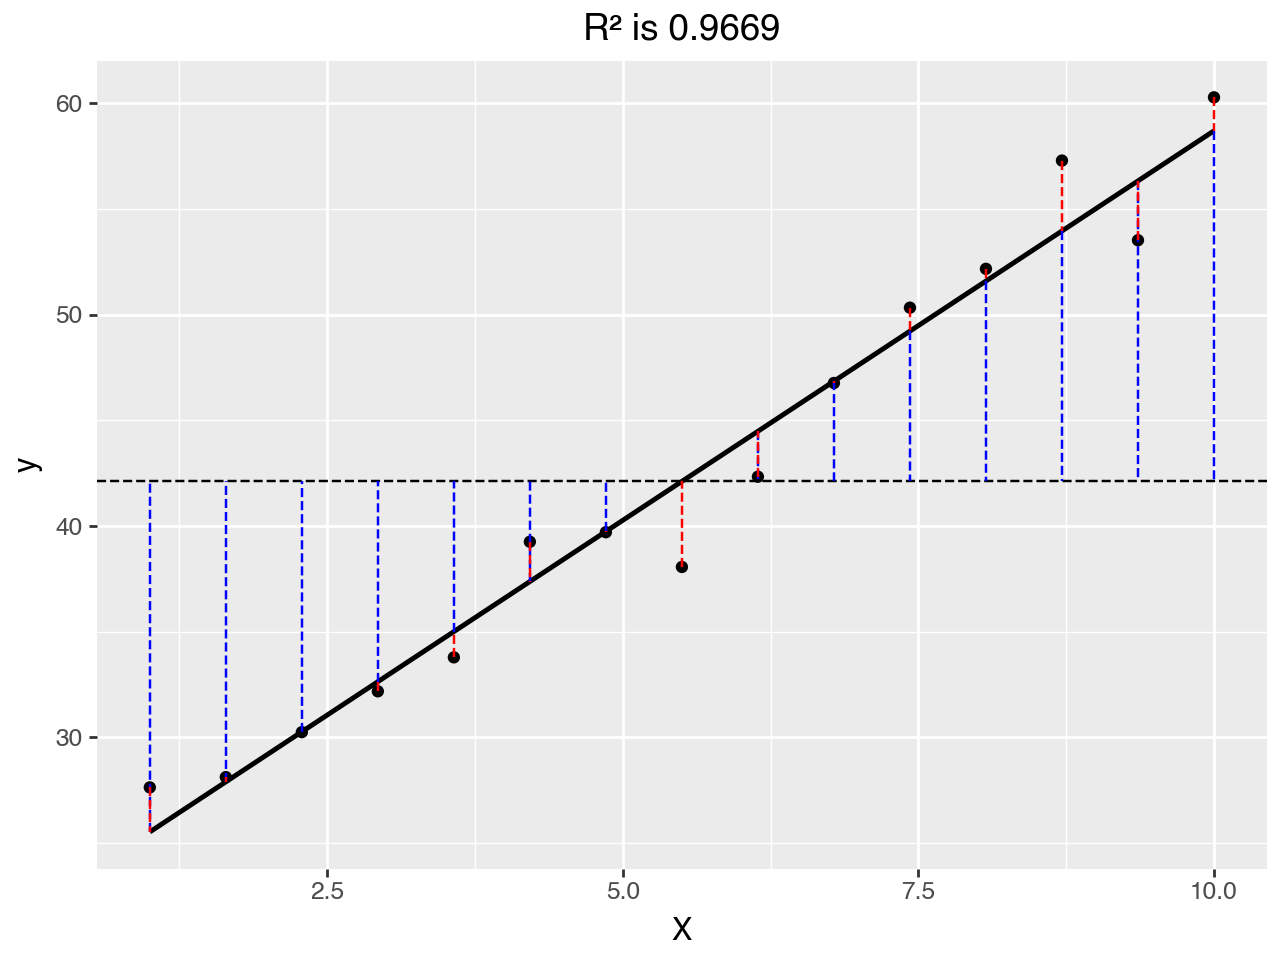

(<plotnine.ggplot.ggplot at 0x33ccd1b50>,
 <plotnine.ggplot.ggplot at 0x33c82fd10>)

In [64]:
print(f"Hypothesis Test:\nH\u2081: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(beta0=20)

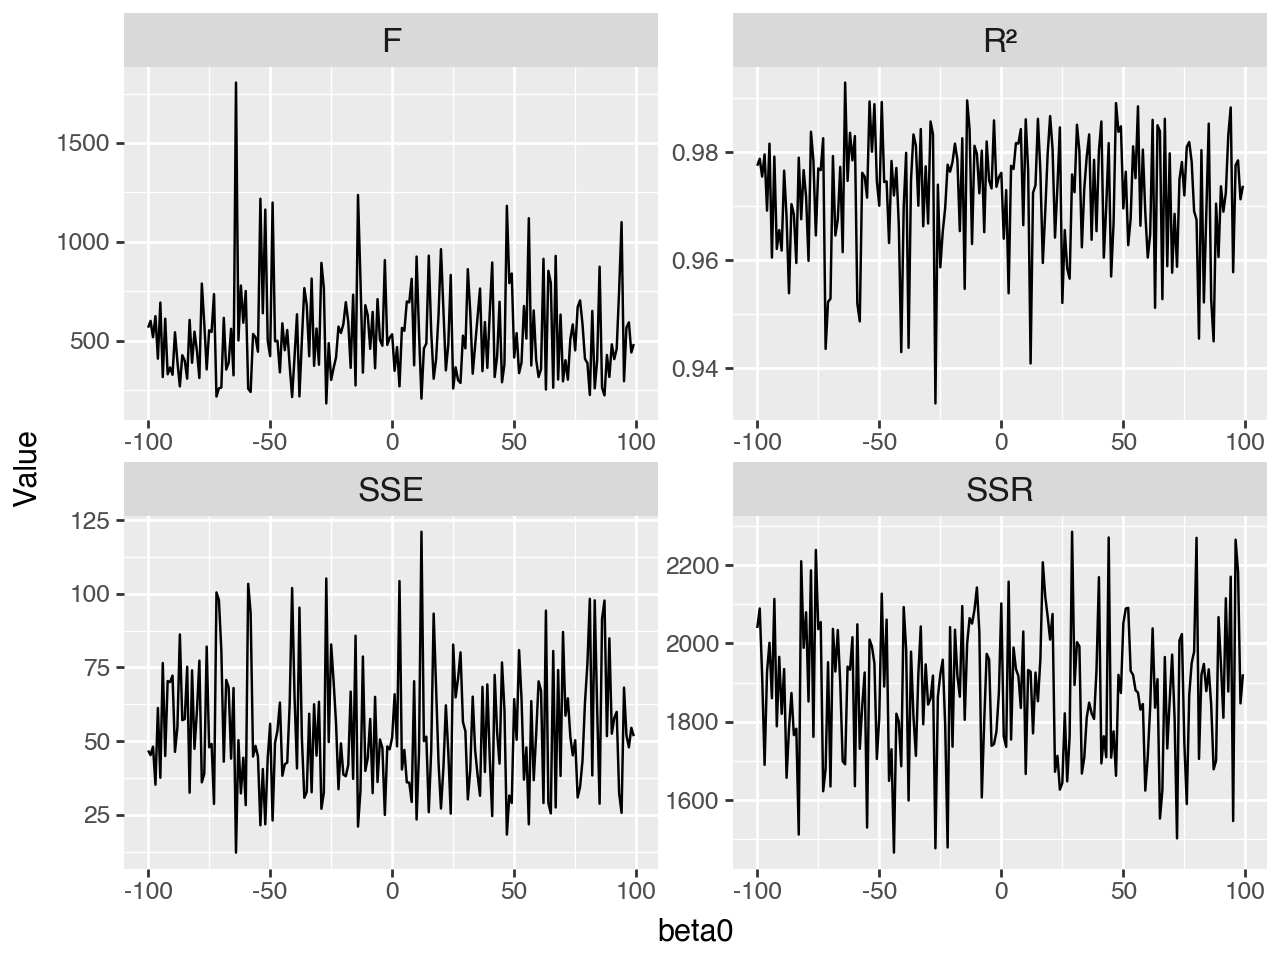

In [65]:
x_vals = list(range(-100, 100))
records = []

for x in x_vals:
    ssr, sse, _, fval, r2 = ss_decomp_graph(beta0=x)
    records.append({"x": x, "value": ssr, "metric": "SSR"})
    records.append({"x": x, "value": sse, "metric": "SSE"})
    records.append({"x": x, "value": fval, "metric": "F"})
    records.append({"x": x, "value": r2,  "metric": "R²"})

df = pd.DataFrame(records)

# Plot with facets (2x2 layout)
(
    ggplot(df, aes("x", "value"))
    + geom_line()
    + facet_wrap("~metric", ncol=2, scales = "free")
    + labs(x="beta0", y="Value")
    + theme(strip_text=element_text(size=12))
)


Holding the slope, sample size, and error variance constant, compare how different values of the intercept affect:
   
    a. the SS decomposition,
    b. the plots,
    c. the coefficient of determination, and
    d. the hypothesis test results.
   What do you find?

a. SS Decomposition:
- SSR increases and decreases alternately in a trend
- SSE increases and decreases alternately in a trend 
- F statistic increases and decreases altertnately in a trend

b. Plots:
- SSR and SSE components increase and decrease as dicussed above 
- The slope remains same and the intercept varies

c. Coefficient of determination:
- R² increases and decreases alternately in a trend

d. Hypothesis test results:
- The F statistic depends majorly on slope and hence throughout the range of intercept there is no such value of  \u2080 which would make us not reject the hypothesis for slope = 3
- If slope  = 0.3, for all values of intercept we fail to reject the null hypothesis.

## Q5

Hypothesis Test:
H₁: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 3, β₁: 4, n: 5, singma: 2
Sample size: 5
SST (Total Sum of Squares): 732.2071
SSR (Regression Sum of Squares): 728.9358
SSE (Error Sum of Squares): 3.2713
SST = SSR + SSE: True
F-Statistic: 668.4827
Critical Value: 10.1280
Coefficient of Determination, R² is: 0.9955
As F is greater than critical value, @ alpha = 0.05, we reject the null hypothesis and say β₁ is not equal to 0



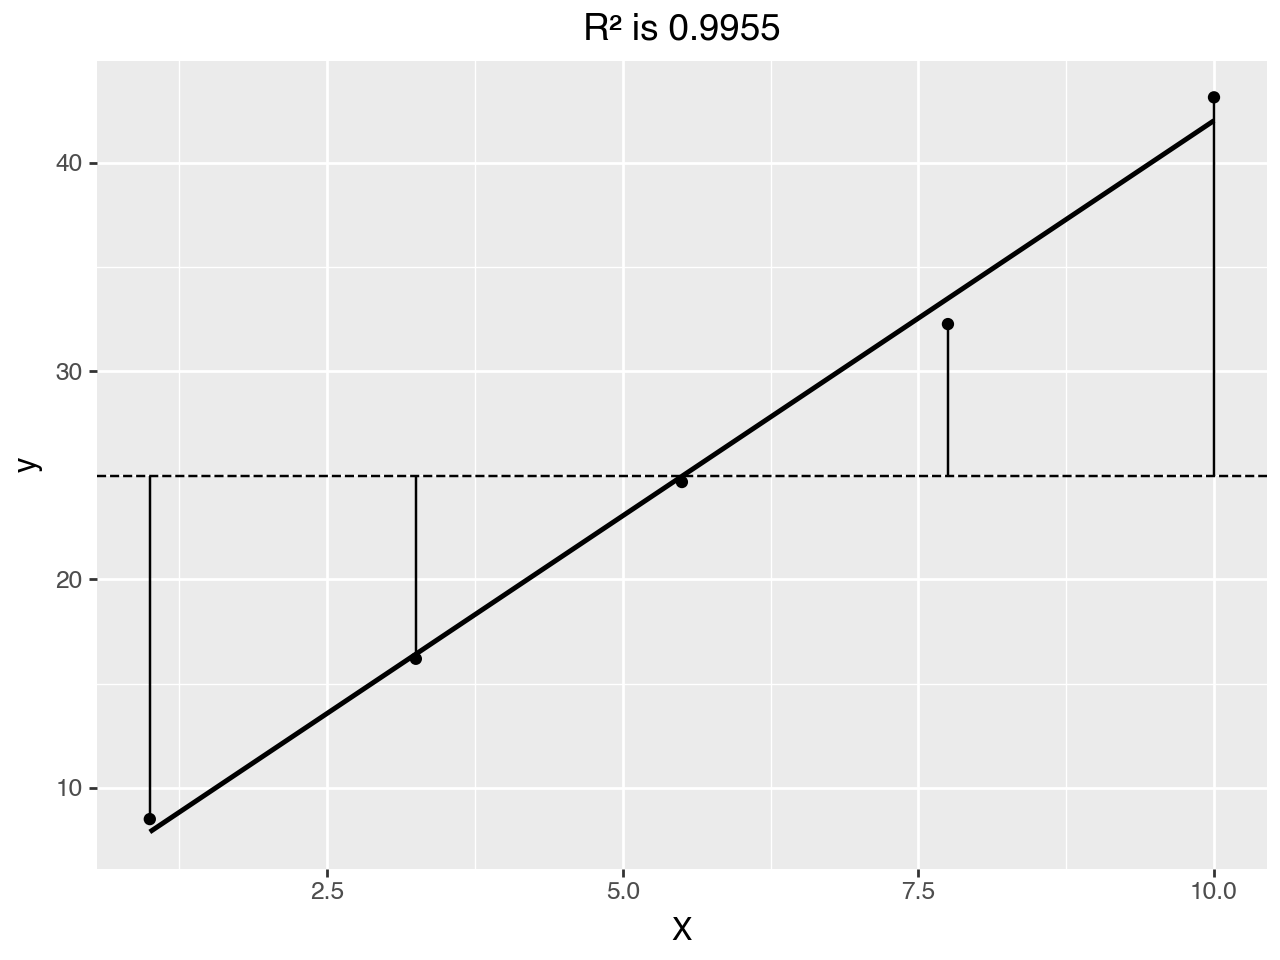

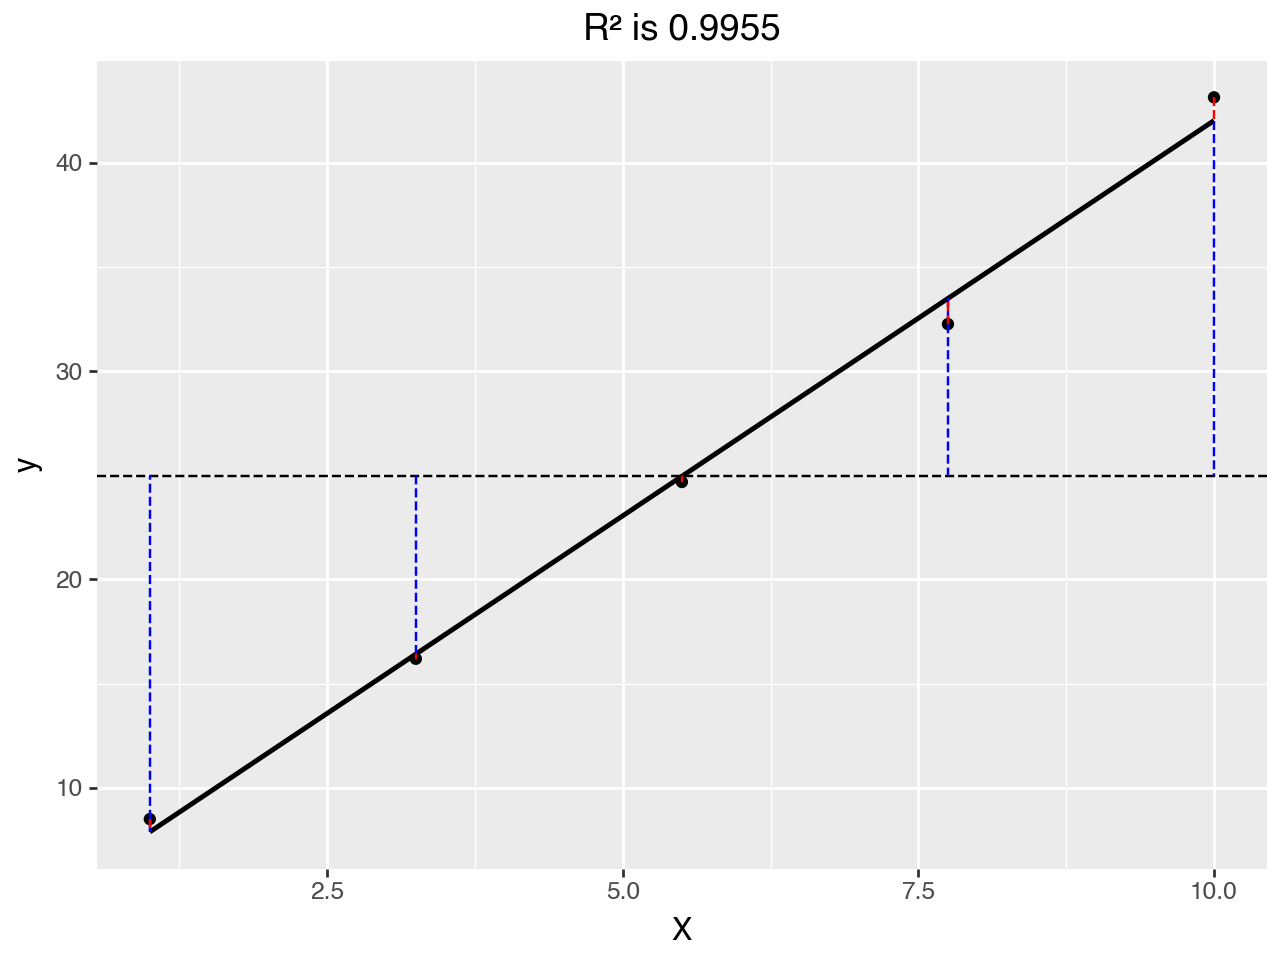

(<plotnine.ggplot.ggplot at 0x33be5ab10>,
 <plotnine.ggplot.ggplot at 0x33be5b350>)

In [66]:
print(f"Hypothesis Test:\nH\u2081: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(n=5)

Hypothesis Test:
H₁: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 3, β₁: 4, n: 3, singma: 2
Sample size: 3
SST (Total Sum of Squares): 608.45
SSR (Regression Sum of Squares): 601.992
SSE (Error Sum of Squares): 6.458
SST = SSR + SSE: True
F-Statistic: 93.2165
Critical Value: 161.4476
Coefficient of Determination, R² is: 0.9894
As F is less than critical value, @ aplha = 0.05, we do not have enough evidence to reject the null hypothesis that β₁ is equal to 0



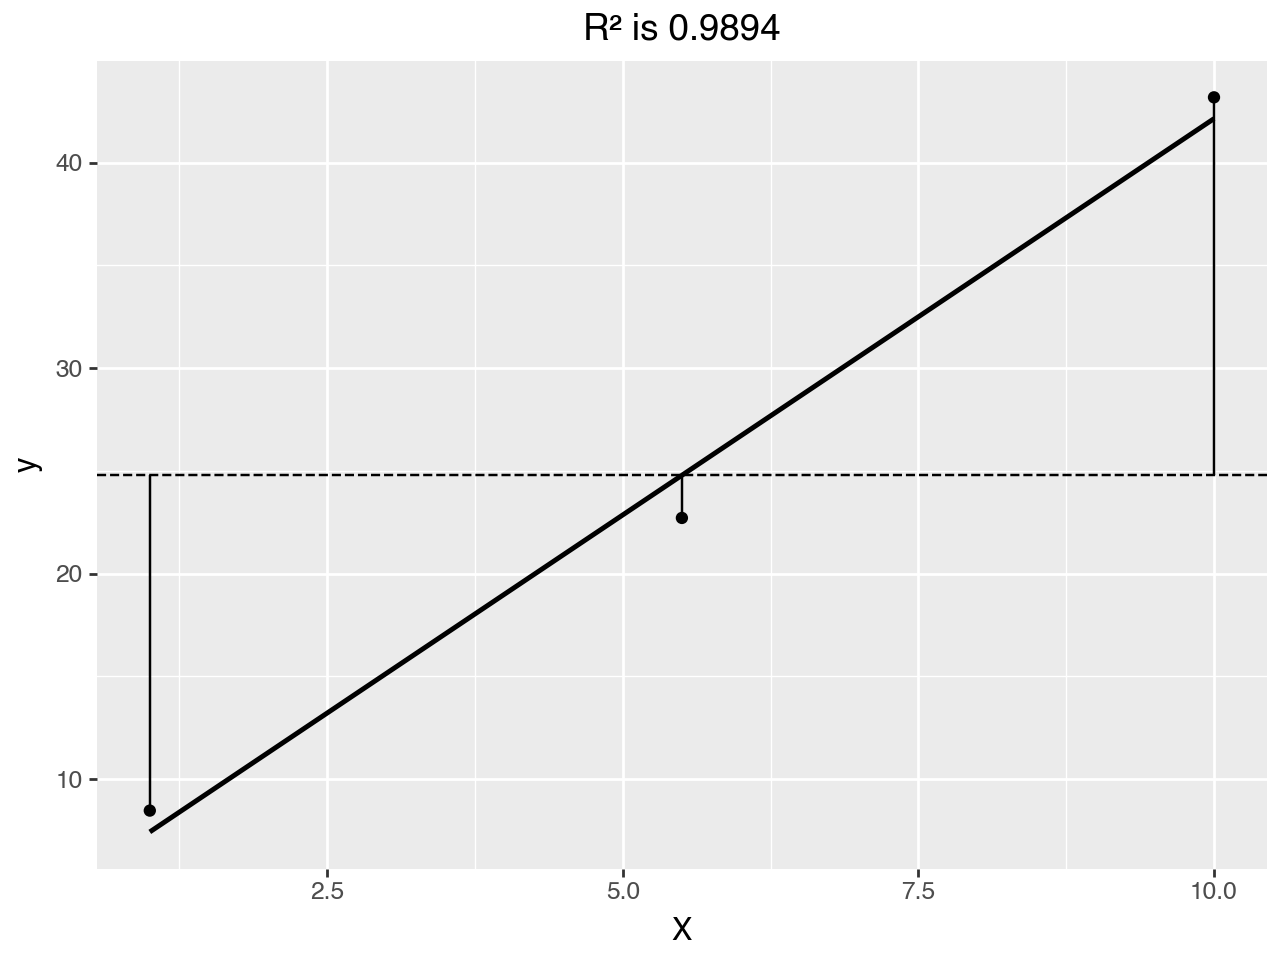

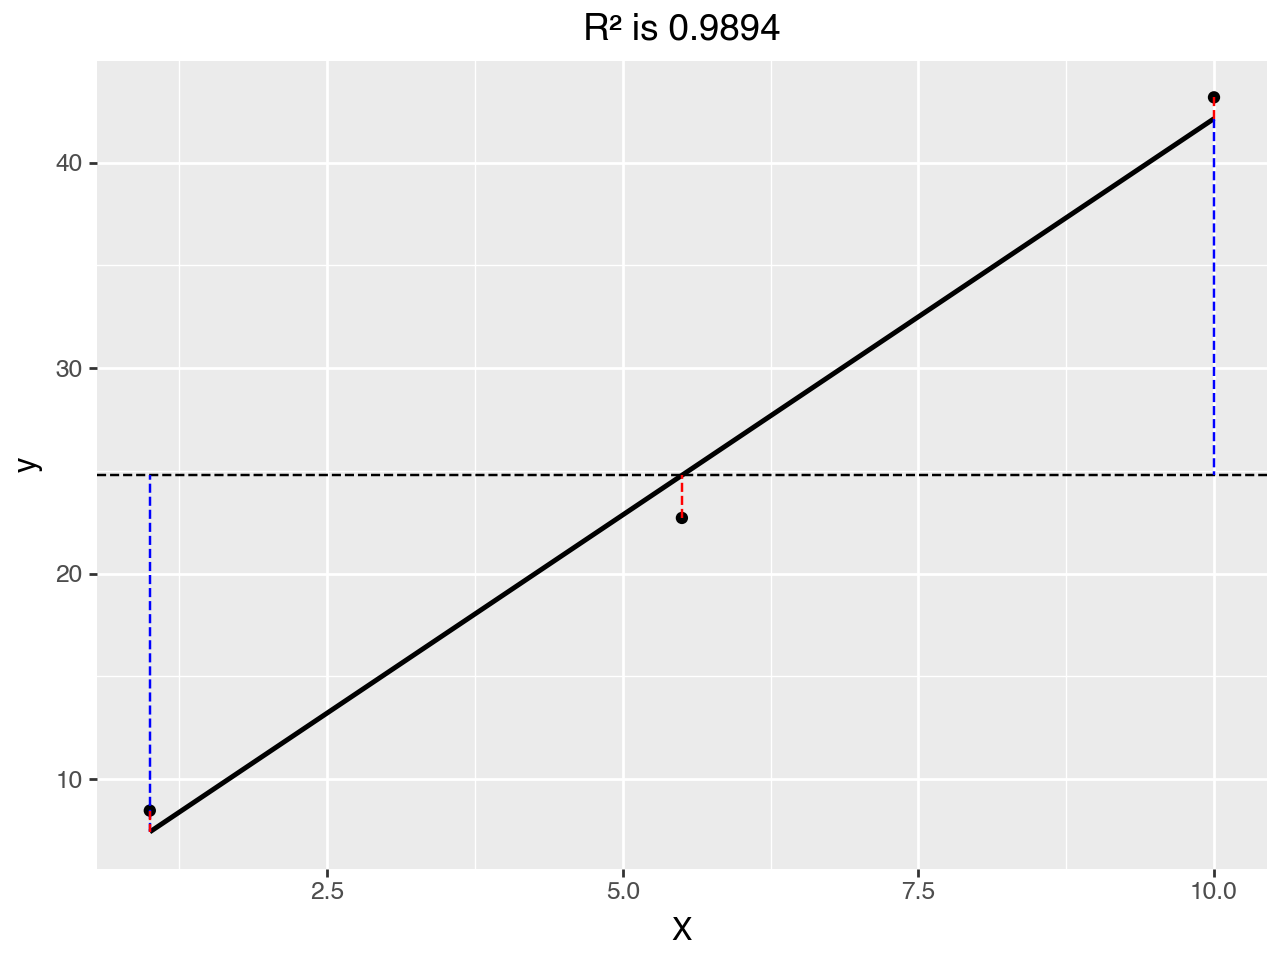

(<plotnine.ggplot.ggplot at 0x338ea90d0>,
 <plotnine.ggplot.ggplot at 0x338ea8d10>)

In [67]:
print(f"Hypothesis Test:\nH\u2081: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(n=3)

Hypothesis Test:
H₁: The slope β₁ = 0
H₁: The slope β₁ ≠ 0

β₀: 3, β₁: 4, n: 20, singma: 2
Sample size: 20
SST (Total Sum of Squares): 2407.4596
SSR (Regression Sum of Squares): 2338.5975
SSE (Error Sum of Squares): 68.8621
SST = SSR + SSE: True
F-Statistic: 611.2906
Critical Value: 4.4139
Coefficient of Determination, R² is: 0.9714
As F is greater than critical value, @ alpha = 0.05, we reject the null hypothesis and say β₁ is not equal to 0



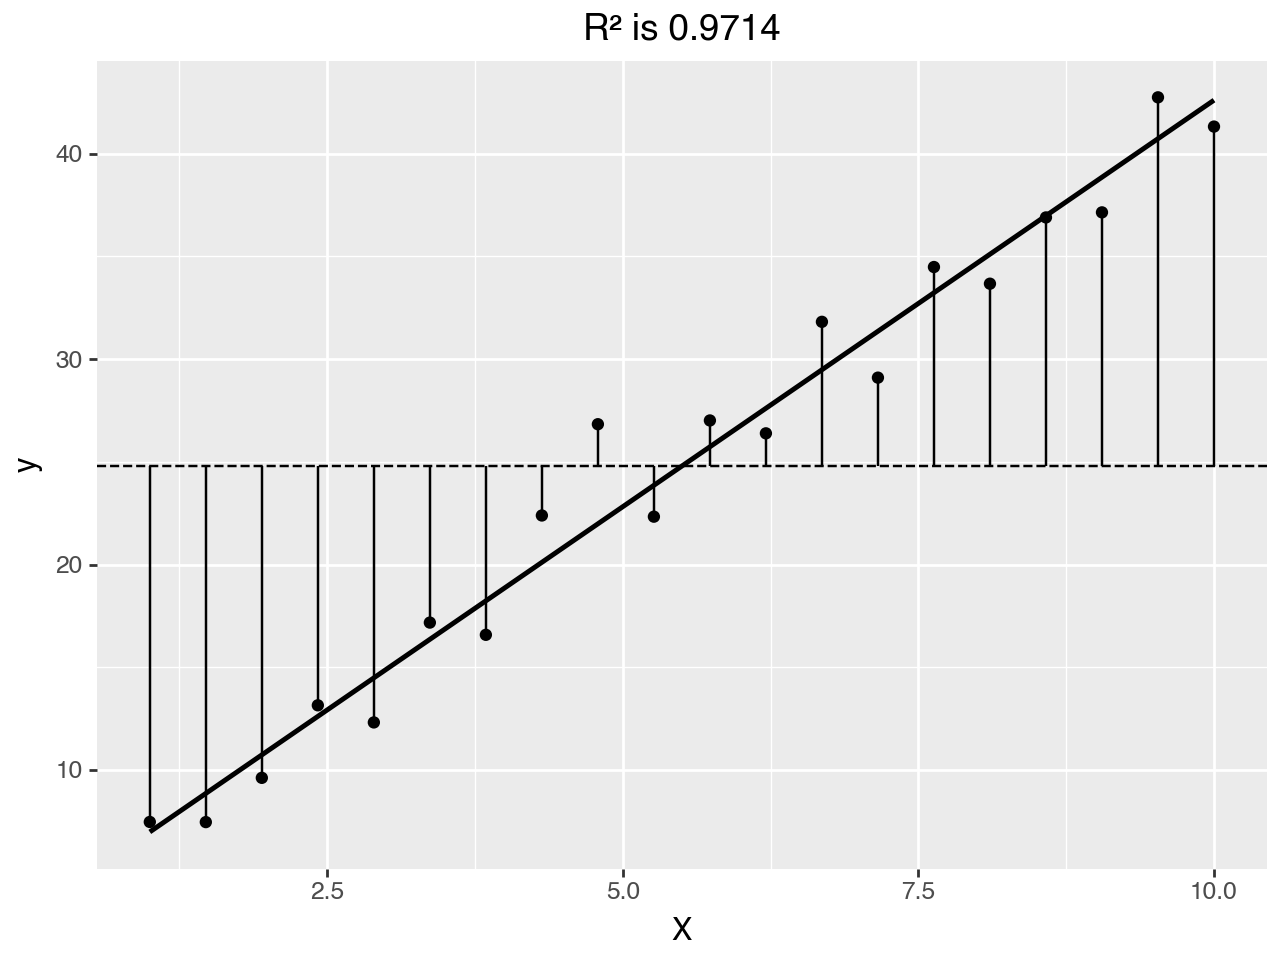

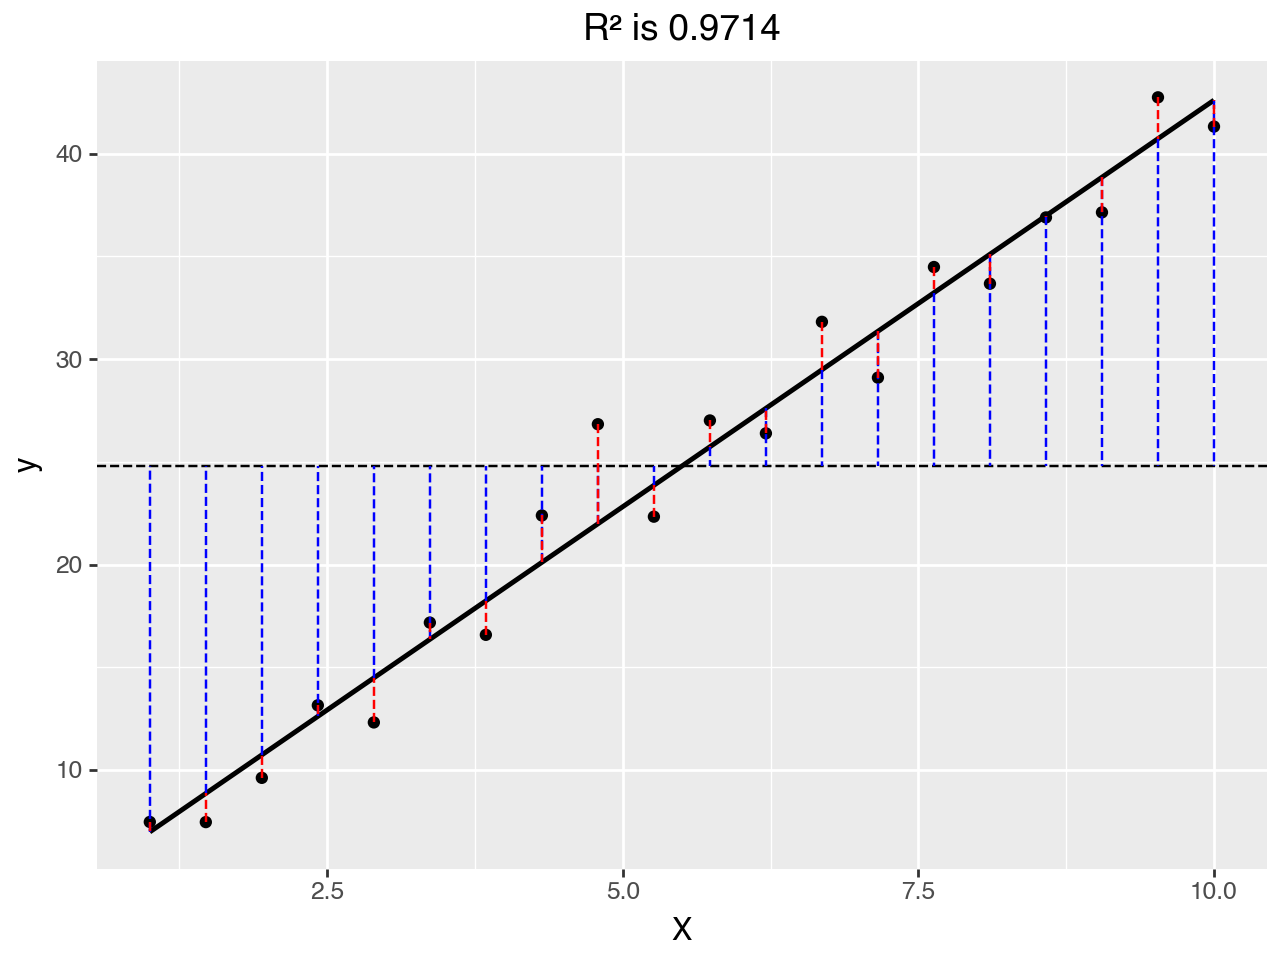

(<plotnine.ggplot.ggplot at 0x338ced790>,
 <plotnine.ggplot.ggplot at 0x338ced190>)

In [68]:
print(f"Hypothesis Test:\nH\u2081: The slope \u03B2\u2081 = 0\nH\u2081: The slope \u03B2\u2081 \u2260 0\n")
ss_decomp(n=20)

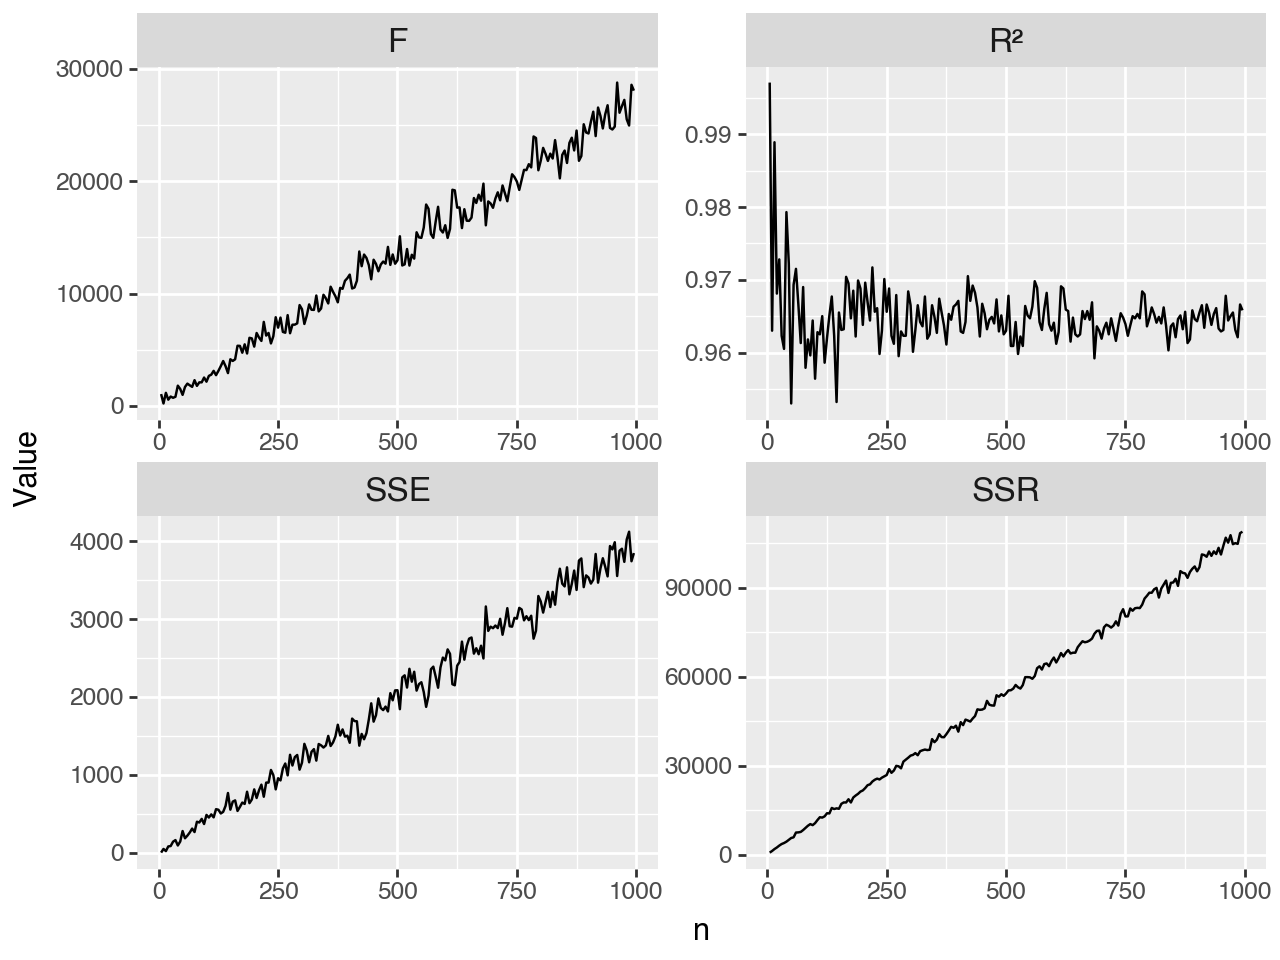

In [69]:
x_vals = list(range(5, 1000, 5))
records = []

for x in x_vals:
    ssr, sse, _, fval, r2 = ss_decomp_graph(n=x)
    records.append({"x": x, "value": ssr, "metric": "SSR"})
    records.append({"x": x, "value": sse, "metric": "SSE"})
    records.append({"x": x, "value": fval, "metric": "F"})
    records.append({"x": x, "value": r2,  "metric": "R²"})

df = pd.DataFrame(records)

# Plot with facets (2x2 layout)
(
    ggplot(df, aes("x", "value"))
    + geom_line()
    + facet_wrap("~metric", ncol=2, scales = "free")
    + labs(x="n", y="Value")
    + theme(strip_text=element_text(size=12))
)

Holding the slope, sample size, and error variance constant, compare how different values of the intercept affect:
   
    a. the SS decomposition,
    b. the plots,
    c. the coefficient of determination, and
    d. the hypothesis test results.
   What do you find?

a. SS Decomposition:
- SSR increases with small deviations with increase in n
- SSE increases with deviations with increase in n 
- F statistic increases with deviations with increase in n 

b. Plots:
- SSR and SSE components increase and decrease as dicussed above 
- The slope and the intercept remains same

c. Coefficient of determination:
- R² decreases initially and later flattens with deviations with increase in n

d. Hypothesis test results:
- for slope = 4 and intercept = 3, we fail to reject the null hypothesis for n = 1,2
- for slope = 4 and intercept = 3, we rejehct null hypiothesis for n > 2

## Q6

In [70]:
X,y = generate_data(2,3,4,15)
np.mean(X.T[0])

np.float64(5.5)

In [71]:
def ss_decomp_FT(sigma=2,beta0=3,beta1=4,n=15):

    X,y = generate_data(sigma,beta0,beta1,n)
    
    model = LinearRegression()
    model.fit(X, y)

    y_mean = np.mean(y)
    x_mean = np.mean(X)
    y_pred = model.predict(X)
    beta1_hat = model.coef_[0]
    e = y-y_pred

    s_squared = np.sum(e**2)/(n - 2)
    se_beta_hat = np.sqrt(s_squared/np.sum((X - x_mean)**2))

    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)

    F = (SSR/1)/(SSE/(n-2)) 
    T = beta1_hat/(se_beta_hat)

    return F,T

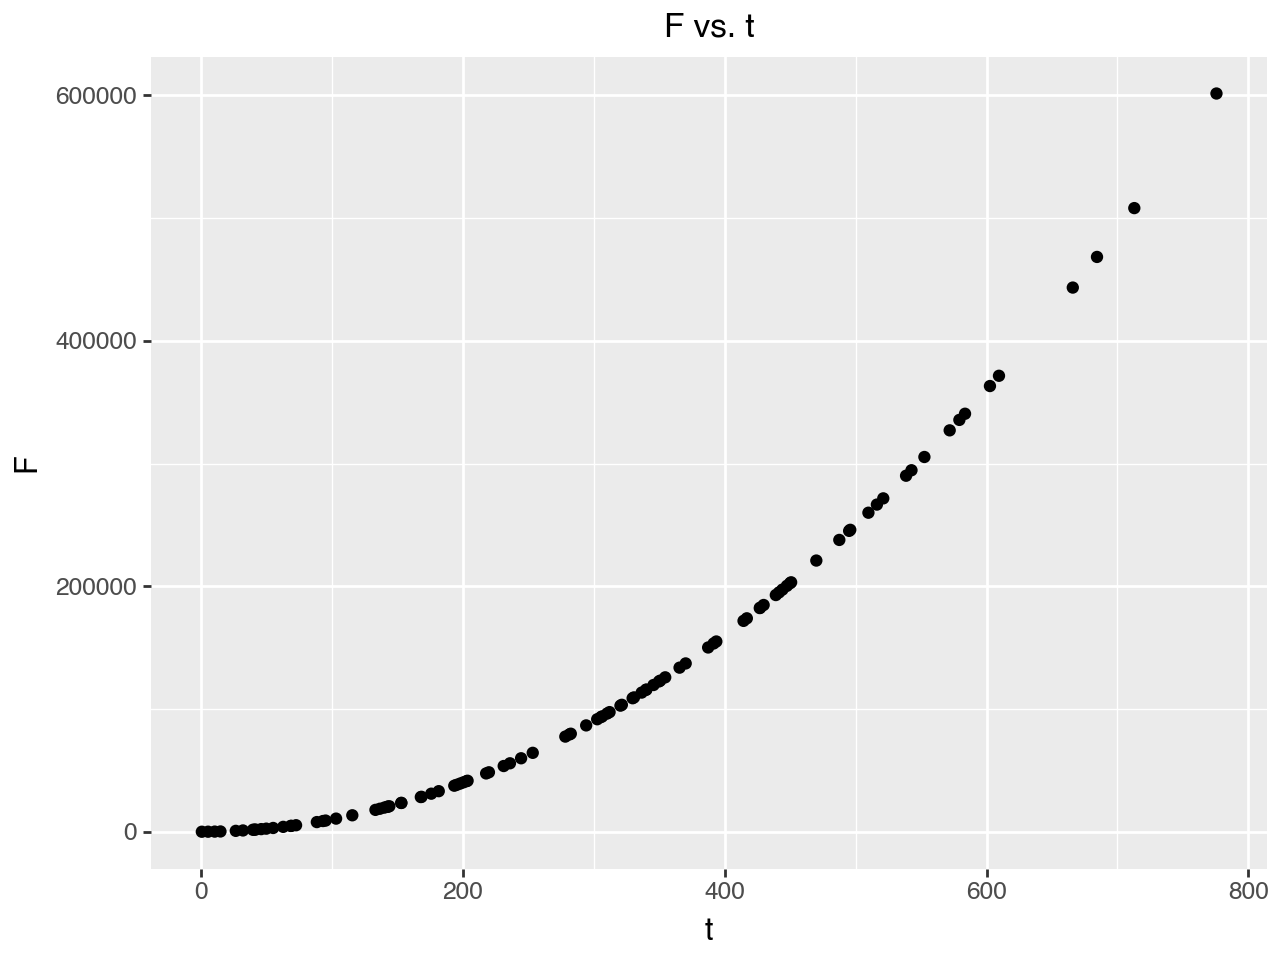

In [72]:
records = []
for i in range(100):
    F, T = ss_decomp_FT(beta1=i)
    records.append({"F": F, "T": T})

df = pd.DataFrame(records)

# Scatter plot
(
    ggplot(df, aes(x="T", y="F"))
    + geom_point()
    + labs(title="F vs. t", x="t", y="F")
    + theme(plot_title=element_text(ha="center", size=12))
)

The relationship is F = t²:

We know $t = \dfrac{\hat{\beta_1}}{\widehat{SE}(\hat{\beta_1})} = \dfrac{\hat{\beta}_1}{\hat{\sigma}/\sqrt{SSX}}$ 

and $F = \dfrac{SSR/1}{SSE/(n-2)}$.

Then notice,

$
\begin{align}
SSR &= \sum_{i=1}^n(\hat{y}_i - \bar{y})^2\\
&=\sum_{i=1}^n(\hat{\beta_0} + \beta_1 x_i - \hat{\beta_0} - \hat{\beta_1}\bar{x})^2 \\
&= \sum_{i=1}^n(\hat{\beta_1}(x_i - \bar{x}))^2\\
&= \hat{\beta}^2_1 \times SSX.
\end{align}
$

And thus, 

$
\begin{align}
F &= \dfrac{SSR/1}{SSE/(n-2)}\\
&= \dfrac{\hat{\beta}^2_1 \times SSX}{SSE/(n-2)}\\
& = \left[\dfrac{\hat{\beta}_1}{\hat{\sigma}/\sqrt{SSX}}\right]^2\\
& = t^2.
\end{align}
$

